## BEMSデータ評価用整形

In [1]:
import pandas as pd
import numpy as np
import copy
import datetime
import os

In [2]:
ls data\src

 ドライブ C のボリューム ラベルは Windows です
 ボリューム シリアル番号は 8E7B-B5D5 です

 C:\Users\k31m0\Kushiro_lab\thermal agent simulation\data\src のディレクトリ

2021/10/24  02:26    <DIR>          .
2021/10/24  02:26    <DIR>          ..
2021/10/12  02:49               283 cool_test_20210715.csv
2021/10/12  02:49            12,747 cool_test_20210715.xlsx
2021/09/17  22:03               533 cool_test_20210715_edit.csv
2021/09/28  00:21            14,592 detail_20210701_20210723.xlsx
2021/09/27  23:35        32,563,840 detail_20210701_20210917.csv
2021/10/19  12:36         8,071,314 detail_20210701_20210917_temp.csv
2021/09/28  01:04            11,968 detail_20210714_20210716.csv
2021/09/28  02:37             6,044 detail_20210715.csv
2021/09/28  14:38             4,128 detail_20210715_test.csv
2021/10/12  15:24             2,932 detail_20210715_test2.csv
2021/10/18  23:38             3,420 init_bems_2021_07_01.csv
2021/10/18  23:40             3,383 init_bems_2021_07_02.csv
2021/10/18  23:44             3,188 init_b

In [3]:
df = pd.read_excel('data/src/TREND_76_6904050_20210701_20210807_20210808110542.xlsx',encoding="shift-jis")

In [4]:
# floors = [4,5]
floors = [5]

ac_arr = {
    4:["4f0","4f1","4f2","4f3","4f4","4f5","4f6","4f7","4f8","4f9"],
    5:["5f0","5f1","5f2","5f3","5f4","5f5","5f6","5f7","5f8","5f9"],
    6:["6f0","6f1","6f2","6f3","6f4","6f5","6f6","6f7","6f8","6f9"]
}


key_map_floor_dict = {
    4:{
        "時間":"信号名称",
        "4f0設定温度":"C4F 事務室中ペリ PACG_設定温度",
        "4f0運転モード":"C4F 事務室中ペリ PACG_運転モード",
#         "4f0風速":"C4F 事務室中ペリ PACG_風速",
        "4f0風速":"C4F 事務室中ペリ_風速",
        "4f0吸込温度":"C4F 事務室中ペリ PACG_吸込温度",
        "4f1設定温度":"C4F 事務室中ペリ PACG_設定温度",
        "4f1運転モード":"C4F 事務室中ペリ PACG_運転モード",
#         "4f1風速":"C4F 事務室中ペリ PACG_風速",
        "4f1風速":"C4F 事務室中ペリ_風速",
        "4f1吸込温度":"C4F 事務室中ペリ PACG_吸込温度",
        "4f2設定温度":"C4F 事務室中 PACG_設定温度",
        "4f2運転モード":"C4F 事務室中 PACG_運転モード",
        "4f2風速":"C4F 事務室中 PACG_風速",
        "4f2吸込温度":"C4F 事務室中 PACG_吸込温度",
        "4f3設定温度":"C4F 事務室中 PACG_設定温度",
        "4f3運転モード":"C4F 事務室中 PACG_運転モード",
        "4f3風速":"C4F 事務室中 PACG_風速",
        "4f3吸込温度":"C4F 事務室中 PACG_吸込温度",
        "4f4設定温度":"C4F 事務室南ペリ PACG_設定温度",
        "4f4運転モード":"C4F 事務室南ペリ PACG_運転モード",
        "4f4風速":"C4F 事務室南ペリ PACG_風速",
        "4f4吸込温度":"C4F 事務室南ペリ PACG_吸込温度",
        "4f5設定温度":"C4F 事務室南ペリ PACG_設定温度",
        "4f5運転モード":"C4F 事務室南ペリ PACG_運転モード",
        "4f5風速":"C4F 事務室南ペリ PACG_風速",
        "4f5吸込温度":"C4F 事務室南ペリ PACG_吸込温度",
        "4f6設定温度":"C4F 事務室南 PACG_設定温度",
        "4f6運転モード":"C4F 事務室南 PACG_運転モード",
        "4f6風速":"C4F 事務室南 PACG_風速",
        "4f6吸込温度":"C4F 事務室南 PACG_吸込温度",
        "4f7設定温度":"C4F 事務室南 PACG_設定温度",
        "4f7運転モード":"C4F 事務室南 PACG_運転モード",
        "4f7風速":"C4F 事務室南 PACG_風速",
        "4f7吸込温度":"C4F 事務室南 PACG_吸込温度",
        "4f8設定温度":"C4F 事務室南 PACG_設定温度",
        "4f8運転モード":"C4F 事務室南 PACG_運転モード",
        "4f8風速":"C4F 事務室南 PACG_風速",
        "4f8吸込温度":"C4F 事務室南 PACG_吸込温度",
        "4f9設定温度":"C4F 事務室東南 PAC_設定温度",
        "4f9運転モード":"C4F 事務室東南 PAC_運転モード",
        "4f9風速":"C4F 事務室東南 PAC_風速",
        "4f9吸込温度":"C4F 事務室東南 PAC_吸込温度",
        "外気温":"B館 RF 外気温度"
    },
5:{
        "時間":"信号名称",
        "5f0設定温度":"C5F 事務室中ペリ PACG_設定温度",
        "5f0運転モード":"C5F 事務室中ペリ PACG_運転モード",
        "5f0風速":"C5F 事務室中ペリ PACG_風速",
        "5f0吸込温度":"C5F 事務室中ペリ PACG_吸込温度",
        "5f1設定温度":"C5F 事務室中ペリ PACG_設定温度",
        "5f1運転モード":"C5F 事務室中ペリ PACG_運転モード",
        "5f1風速":"C5F 事務室中ペリ PACG_風速",
        "5f1吸込温度":"C5F 事務室中ペリ PACG_吸込温度",
        "5f2設定温度":"C5F 事務室中 PACG_設定温度",
        "5f2運転モード":"C5F 事務室中 PACG_運転モード",
        "5f2風速":"C5F 事務室中 PACG_風速",
        "5f2吸込温度":"C5F 事務室中 PACG_吸込温度",
        "5f3設定温度":"C5F 事務室中 PACG_設定温度",
        "5f3運転モード":"C5F 事務室中 PACG_運転モード",
        "5f3風速":"C5F 事務室中 PACG_風速",
        "5f3吸込温度":"C5F 事務室中 PACG_吸込温度",
        "5f4設定温度":"C5F 事務室南ペリ PACG_設定温度",
        "5f4運転モード":"C5F 事務室南ペリ PACG_運転モード",
        "5f4風速":"C5F 事務室南ペリ PACG_風速",
        "5f4吸込温度":"C5F 事務室南ペリ PACG_吸込温度",
        "5f5設定温度":"C5F 事務室南ペリ PACG_設定温度",
        "5f5運転モード":"C5F 事務室南ペリ PACG_運転モード",
        "5f5風速":"C5F 事務室南ペリ PACG_風速",
        "5f5吸込温度":"C5F 事務室南ペリ PACG_吸込温度",
        "5f6設定温度":"C5F 事務室南 PACG_設定温度",
        "5f6運転モード":"C5F 事務室南 PACG_運転モード",
        "5f6風速":"C5F 事務室南 PACG_風速",
        "5f6吸込温度":"C5F 事務室南 PACG_吸込温度",
        "5f7設定温度":"C5F 事務室南 PACG_設定温度",
        "5f7運転モード":"C5F 事務室南 PACG_運転モード",
        "5f7風速":"C5F 事務室南 PACG_風速",
        "5f7吸込温度":"C5F 事務室南 PACG_吸込温度",
        "5f8設定温度":"C5F 事務室南 PACG_設定温度",
        "5f8運転モード":"C5F 事務室南 PACG_運転モード",
        "5f8風速":"C5F 事務室南 PACG_風速",
        "5f8吸込温度":"C5F 事務室南 PACG_吸込温度",
        "5f9設定温度":"C5F 事務室東南 PAC_設定温度",
        "5f9運転モード":"C5F 事務室東南 PAC_運転モード",
        "5f9風速":"C5F 事務室東南 PAC_風速",
        "5f9吸込温度":"C5F 事務室東南 PAC_吸込温度",
        "5気温":"B館 RF 外気温度"
    },
6:{
        "時間":"信号名称",
        "6f0設定温度":"C6F 事務室中ぺリ PACG_設定温度",
        "6f0運転モード":"C6F 事務室中ペリ PACG_運転モード",
        "6f0風速":"C6F 事務室中ペリ PACG_風速",
        "6f0吸込温度":"C6F 事務室中ぺリ PACG_吸込温度",
        "6f1設定温度":"C6F 事務室中ぺリ PACG_設定温度",
        "6f1運転モード":"C6F 事務室中ペリ PACG_運転モード",
        "6f1風速":"C6F 事務室中ペリ PACG_風速",
        "6f1吸込温度":"C6F 事務室中ぺリ PACG_吸込温度",
        "6f2設定温度":"C6F 事務室中 PACG_設定温度",
        "6f2運転モード":"C6F 事務室中 PACG_運転モード",
        "6f2風速":"C6F 事務室中 PACG_風速",
        "6f2吸込温度":"C6F 事務室中 PACG_吸込温度",
        "6f3設定温度":"C6F 事務室中 PACG_設定温度",
        "6f3運転モード":"C6F 事務室中 PACG_運転モード",
        "6f3風速":"C6F 事務室中 PACG_風速",
        "6f3吸込温度":"C6F 事務室中 PACG_吸込温度",
        "6f4設定温度":"C6F 事務室南ペリ PACG_設定温度",
        "6f4運転モード":"C6F 事務室南ペリ PACG_運転モード",
        "6f4風速":"C6F 事務室南ペリ PACG_風速",
        "6f4吸込温度":"C6F 事務室南ペリ PACG_吸込温度",
        "6f5設定温度":"C6F 事務室南ペリ PACG_設定温度",
        "6f5運転モード":"C6F 事務室南ペリ PACG_運転モード",
        "6f5風速":"C6F 事務室南ペリ PACG_風速",
        "6f5吸込温度":"C6F 事務室南ペリ PACG_吸込温度",
        "6f6設定温度":"C6F 事務室南 PACG_設定温度",
        "6f6運転モード":"C6F 事務室南 PACG_運転モード",
        #"6f6風速":"C6F 事務室南 PACG_風速",
        "6f6吸込温度":"C6F 事務室南 PACG_吸込温度",
        "6f7設定温度":"C6F 事務室南 PACG_設定温度",
        "6f7運転モード":"C6F 事務室南 PACG_運転モード",
        #"6f7風速":"C6F 事務室南 PACG_風速",
        "6f7吸込温度":"C6F 事務室南 PACG_吸込温度",
        "6f8設定温度":"C6F 事務室南 PACG_設定温度",
        "6f8運転モード":"C6F 事務室南 PACG_運転モード",
        #"6f8風速":"C6F 事務室南 PACG_風速",
        "6f8吸込温度":"C6F 事務室南 PACG_吸込温度",
        "6f9設定温度":"C6F 事務室東南 PAC_設定温度",
        "6f9運転モード":"C6F 事務室東南 PAC_運転モード",
        "6f9風速":"C6F 事務室東南 PAC_風速",
        "6f9吸込温度":"C6F 事務室東南 PAC_吸込温度",
        "外気温":"B館 RF 外気温度"
    },
}

In [5]:
data_all = {}
for floor in floors:
    result_df = pd.DataFrame()
    data_all[floor] = result_df

In [6]:
def init_cvt(df):
    df.columns = df.loc[6]
    df = df.drop(df.index[[0,1,2, 3,4, 5,6,7,8,9]])
    return df.loc[:,~df.columns.str.contains("ロスナイ|湿度|電力量|電流|ﾛｽﾅｲ")]

In [7]:
def split_floor_data(df,floor_arr):
    df = df.reset_index()
    start_time = df["信号名称"].loc[0]
    end_time   = df["信号名称"].loc[len(df)-1]
    df_floors = {}
    for floor in floor_arr:
        df_floors[floor] = df.loc[:,df.columns.str.contains("信号名称|外気温度|{}F".format(floor))]
    
    return df_floors, start_time, end_time

In [8]:
def select_columns(df):
    control_columns = []
    init_bems_columns = []
    for c in df.columns:
        if "吸込温度" in c:
            init_bems_columns.append(c)
        else:
            if("時間" in c) or ("外気温" in c):
                init_bems_columns.append(c)
                control_columns.append(c)
            else:
                control_columns.append(c)
    
    return init_bems_columns,control_columns

In [9]:
df_cvt = init_cvt(df)
df_cvt_arr,start_time,end_time = split_floor_data(df_cvt,floors)

In [20]:
column = []
for i in df_cvt_arr[5].columns:
    if "設定温度" in i or "信号名称" in i:
        column.append(i)

In [21]:
df_cvt_arr[5][column]

6,信号名称,C5F 事務室北ペリ PACG_設定温度,C5F 事務室北 PACG_設定温度,C5F 事務室中ペリ PACG_設定温度,C5F 事務室中 PACG_設定温度,C5F 事務室南ペリ PACG_設定温度,C5F 事務室南 PACG_設定温度,C5F 事務室東南 PAC_設定温度
0,2021-07-01 00:00:00,25,25,25,25,25,26,24
1,2021-07-01 00:01:00,25,25,25,25,25,26,24
2,2021-07-01 00:02:00,25,25,25,25,25,26,24
3,2021-07-01 00:03:00,25,25,25,25,25,26,24
4,2021-07-01 00:04:00,25,25,25,25,25,26,24
...,...,...,...,...,...,...,...,...
54715,2021-08-07 23:55:00,25,25,25,25,25,25,25
54716,2021-08-07 23:56:00,25,25,25,25,25,25,25
54717,2021-08-07 23:57:00,25,25,25,25,25,25,25
54718,2021-08-07 23:58:00,25,25,25,25,25,25,25


In [22]:
def adjustment_items(df_arr,season):
    df_result_dic = {}
    for floor,df in df_arr.items():
        air_con_area = [f'C{floor}F 事務室北ペリ PACG_',f'C{floor}F 事務室北 PACG_',f'C{floor}F 事務室中ペリ PACG_',f'C{floor}F 事務室中 PACG_',f'C{floor}F 事務室南ペリ PACG_',f'C{floor}F 事務室南 PACG_',f'C{floor}F 事務室東南 PAC_'] 
        df_result = copy.deepcopy(df)
        for one in air_con_area:
             # 運連状態が0なら電源OFF（0）
            df_result.loc[df_result[one+'運転']==0,one+'運転モード'] = 0
            # 運転状態が1で省エネレベルが2,3または運転モードが3なら送風（3）
            df_result.loc[(df_result[one+'運転']==1) & ((df_result[f'C館 {floor}F G50_省エネレベル'] == 2) | (df_result[f'C館 {floor}F G50_省エネレベル'] == 3) | (df_result[one+'運転モード'] == 3)),one+'運転モード'] = 3
             # 夏期の場合
            if season == 0:
                 # 運転状態が1で省エネレベルが1の場合は冷房（1）
                df_result.loc[(df_result[one+'運転']==1) & (df_result[f'C館 {floor}F G50_省エネレベル'] == 1),one+'運転モード'] = 1
            # 冬期の場合
            elif season == 1: 
                 # 運転状態が1で省エネレベルが1で運転モードが2のとき暖房（2）
                df_result.loc[(df_result[one+'運転']==1) & ((df_result[f'C館 {floor}F G50_省エネレベル'] == 1) & (df_result[one+'運転モード'] == 2)),one+'運転モード'] = 2
                 # 冬季のインペリ側
                if (one == f'C{floor}F 事務室中 PACG_') or (one == f'C{floor}F 事務室南 PACG_'):
                    # インペリ側で運転ONかつ暖房のときは＋４℃アップ制御 
                    df_result.loc[(df_result[one+'運転']==1) & (df_result[one+'運転モード'] == 2),one+'吸込温度'] += 4
            # 中間期の場合
            else:
                # 運転状態が1で省エネレベルが1の場合は冷房（1）
                df_result.loc[(df_result[one+'運転']==1) & (df_result[f'C館 {floor}F G50_省エネレベル'] == 1),one+'運転モード'] = 1
                # 運転状態が1で省エネレベルが1で運転モードが2のとき暖房（2）
                df_result.loc[(df_result[one+'運転']==1) & ((df_result[f'C館 {floor}F G50_省エネレベル'] == 1) & (df_result[one+'運転モード'] == 2)),one+'運転モード'] = 2
        
        df_result_dic[floor] = df_result
    return df_result_dic

In [23]:
result_df_dic = adjustment_items(df_cvt_arr,1)

In [27]:
for floor in floors:
    for key,value in key_map_floor_dict[floor].items():
        data_all[floor][key] = result_df_dic[floor][value].values

In [28]:
date_gap = (end_time - start_time).days

In [29]:
def format_30min_span_data(df):
    index_arr = []
    for i in range(len(df)):
        if df.iloc[i]["時間"].minute == 0 or df.iloc[i]["時間"].minute == 30:
            index_arr.append(df.index[i])
    return df.loc[index_arr]

In [30]:
result_arr = []
base_time = start_time
for i in range(1,date_gap+1) :
    floors_data = {}
    floors_control_data = {}
    floors_init_bems_data = {}
    for key,value in data_all.items():
        next_time = base_time + datetime.timedelta(days=1)
        _value = value[(value["時間"] >= datetime.datetime(base_time.year,base_time.month,base_time.day))&(value["時間"] < datetime.datetime(next_time.year,next_time.month,next_time.day))]
        floors_data[key] = _value
        bems_columns, control_columns = select_columns(_value)
        floors_control_data[key] = _value[control_columns]
        floors_init_bems_data[key] = format_30min_span_data(_value[bems_columns])
    result_arr.append(
        {
            "time":"{0}_{1}_{2}".format(base_time.year,base_time.month,base_time.day),
            "data":floors_data,
            "control":floors_control_data,
            "init_bems":floors_init_bems_data
        })
    base_time = next_time

In [34]:
def select_columns(df):
    control_columns = []
    init_bems_columns = []
    for c in df.columns:
        if "吸込温度" in c:
            init_bems_columns.append(c)
        else:
            if("時間" in c) or ("外気温" in c):
                init_bems_columns.append(c)
                control_columns.append(c)
            else:
                control_columns.append(c)
    
    return init_bems_columns,control_columns

In [38]:
result_arr[0]['data'][5]

,時間,5f0設定温度,5f0運転モード,5f0風速,5f0吸込温度,5f1設定温度,5f1運転モード,5f1風速,5f1吸込温度,5f2設定温度,...,5f7吸込温度,5f8設定温度,5f8運転モード,5f8風速,5f8吸込温度,5f9設定温度,5f9運転モード,5f9風速,5f9吸込温度,5気温
0,2021-07-01 00:00:00,25,0,3,25.2,25,0,3,25.2,25,...,26.8,26,0,3,26.8,24,0,1,24.4,21.3
1,2021-07-01 00:01:00,25,0,3,25.2,25,0,3,25.2,25,...,26.8,26,0,3,26.8,24,0,1,24.4,21.3
2,2021-07-01 00:02:00,25,0,3,25.2,25,0,3,25.2,25,...,26.8,26,0,3,26.8,24,0,1,24.4,21.3
3,2021-07-01 00:03:00,25,0,3,25.2,25,0,3,25.2,25,...,26.8,26,0,3,26.8,24,0,1,24.4,21.3
4,2021-07-01 00:04:00,25,0,3,25.2,25,0,3,25.2,25,...,26.8,26,0,3,26.8,24,0,1,24.4,21.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,2021-07-01 23:55:00,25,0,3,25.2,25,0,3,25.2,27,...,26.4,25,0,3,26.4,24,0,1,24,20.6
1436,2021-07-01 23:56:00,25,0,3,25.2,25,0,3,25.2,27,...,26.4,25,0,3,26.4,24,0,1,24,20.7
1437,2021-07-01 23:57:00,25,0,3,25.2,25,0,3,25.2,27,...,26.4,25,0,3,26.4,24,0,1,24,20.7
1438,2021-07-01 23:58:00,25,0,3,25.2,25,0,3,25.2,27,...,26.4,25,0,3,26.4,24,0,1,24,20.6


In [39]:
all_data_dir_path = "data/evaluation/base/"
control_data_dir_path = "data/evaluation/control/"
init_bems_data_dir_path = "data/evaluation/init_bems/"

for i in result_arr:
    time_dir = i["time"] + "/"
    os.makedirs(all_data_dir_path + time_dir,exist_ok=True)
    os.makedirs(control_data_dir_path + time_dir,exist_ok=True)
    os.makedirs(init_bems_data_dir_path + time_dir,exist_ok=True)
    for key in i["data"].keys():
        file_all_data_path = all_data_dir_path + time_dir + "all_bems_data{}.csv".format(key)
        file_control_path  = control_data_dir_path + time_dir + "control_{}.csv".format(key)
        file_init_bems_path  = init_bems_data_dir_path + time_dir + "init_bems_{}.csv".format(key)
        i["data"][key].to_csv(file_all_data_path,encoding='shift-jis',index=False)
        i["control"][key].to_csv(file_control_path,encoding='shift-jis',index=False)
        i["init_bems"][key].to_csv(file_init_bems_path,encoding='shift-jis',index=False)

## シミュレーション結果評価プログラム

In [111]:
import pandas as pd
import numpy as np
import copy
import datetime
from datetime import datetime as dt
import matplotlib.pyplot as plt

In [112]:
out_file_path = 'out/result_2021_07_1_1500/cmp/result5.csv'
floor = out_file_path.split(".")[0][-1]
df_result = pd.read_csv(out_file_path,encoding="shift-jis")

In [113]:
time = df_result.iloc[0]["時間"]
dt_time = dt.strptime(time, '%Y-%m-%d %H:%M:%S')
base_dir = "data/evaluation/base/{0}_{1}_{2}/".format(dt_time.year,dt_time.month,dt_time.day)
base_file_path = base_dir + "all_bems_data{}.csv".format(floor)
df_base = pd.read_csv(base_file_path,encoding="shift-jis")

In [128]:
df_base.head()

,時間,5f0設定温度,5f0運転モード,5f0風速,5f0吸込温度,5f1設定温度,5f1運転モード,5f1風速,5f1吸込温度,5f2設定温度,...,5f7吸込温度,5f8設定温度,5f8運転モード,5f8風速,5f8吸込温度,5f9設定温度,5f9運転モード,5f9風速,5f9吸込温度,5気温
0,2021-07-01 00:00:00,25,0,3,25.2,25,0,3,25.2,25,...,26.8,26,0,3,26.8,24,0,1,24.4,21.3
1,2021-07-01 00:01:00,25,0,3,25.2,25,0,3,25.2,25,...,26.8,26,0,3,26.8,24,0,1,24.4,21.3
2,2021-07-01 00:02:00,25,0,3,25.2,25,0,3,25.2,25,...,26.8,26,0,3,26.8,24,0,1,24.4,21.3
3,2021-07-01 00:03:00,25,0,3,25.2,25,0,3,25.2,25,...,26.8,26,0,3,26.8,24,0,1,24.4,21.3
4,2021-07-01 00:04:00,25,0,3,25.2,25,0,3,25.2,25,...,26.8,26,0,3,26.8,24,0,1,24.4,21.3


In [129]:
df_result.head()

,時間,5f0吸込温度,5f1吸込温度,5f2吸込温度,5f3吸込温度,5f4吸込温度,5f5吸込温度,5f6吸込温度,5f7吸込温度,5f8吸込温度,5f9吸込温度
0,2021-07-01 15:00:00,24.800000,24.800000,26.000000,26.000000,25.200000,25.200000,24.800000,24.800000,24.800000,23.600000
1,2021-07-01 15:01:00,24.800092,24.800109,25.999999,25.999999,25.200063,25.213274,24.800310,24.800001,24.800000,23.600731
2,2021-07-01 15:02:00,24.800354,24.800420,25.999997,25.999999,25.200250,25.226421,24.800826,24.800009,24.800000,23.601695
3,2021-07-01 15:03:00,24.800782,24.800928,25.999997,26.000003,25.200559,25.239443,24.801543,24.800024,24.800000,23.602887
4,2021-07-01 15:04:00,24.801373,24.801629,26.000000,26.000015,25.200986,25.252346,24.802453,24.800043,24.800001,23.604301


In [130]:
df_new_colomns = ["時間"]
columns = []
for i in df_result.columns:
    if "吸込温度" in i:
        df_new_colomns.append(i+"_予測")
        columns.append(i)
df_result.columns = df_new_colomns

In [131]:
df_result.head()

,時間,5f0吸込温度_予測,5f1吸込温度_予測,5f2吸込温度_予測,5f3吸込温度_予測,5f4吸込温度_予測,5f5吸込温度_予測,5f6吸込温度_予測,5f7吸込温度_予測,5f8吸込温度_予測,5f9吸込温度_予測
0,2021-07-01 15:00:00,24.800000,24.800000,26.000000,26.000000,25.200000,25.200000,24.800000,24.800000,24.800000,23.600000
1,2021-07-01 15:01:00,24.800092,24.800109,25.999999,25.999999,25.200063,25.213274,24.800310,24.800001,24.800000,23.600731
2,2021-07-01 15:02:00,24.800354,24.800420,25.999997,25.999999,25.200250,25.226421,24.800826,24.800009,24.800000,23.601695
3,2021-07-01 15:03:00,24.800782,24.800928,25.999997,26.000003,25.200559,25.239443,24.801543,24.800024,24.800000,23.602887
4,2021-07-01 15:04:00,24.801373,24.801629,26.000000,26.000015,25.200986,25.252346,24.802453,24.800043,24.800001,23.604301


In [132]:
df_merge = pd.merge(df_base, df_result, on='時間', how="inner")

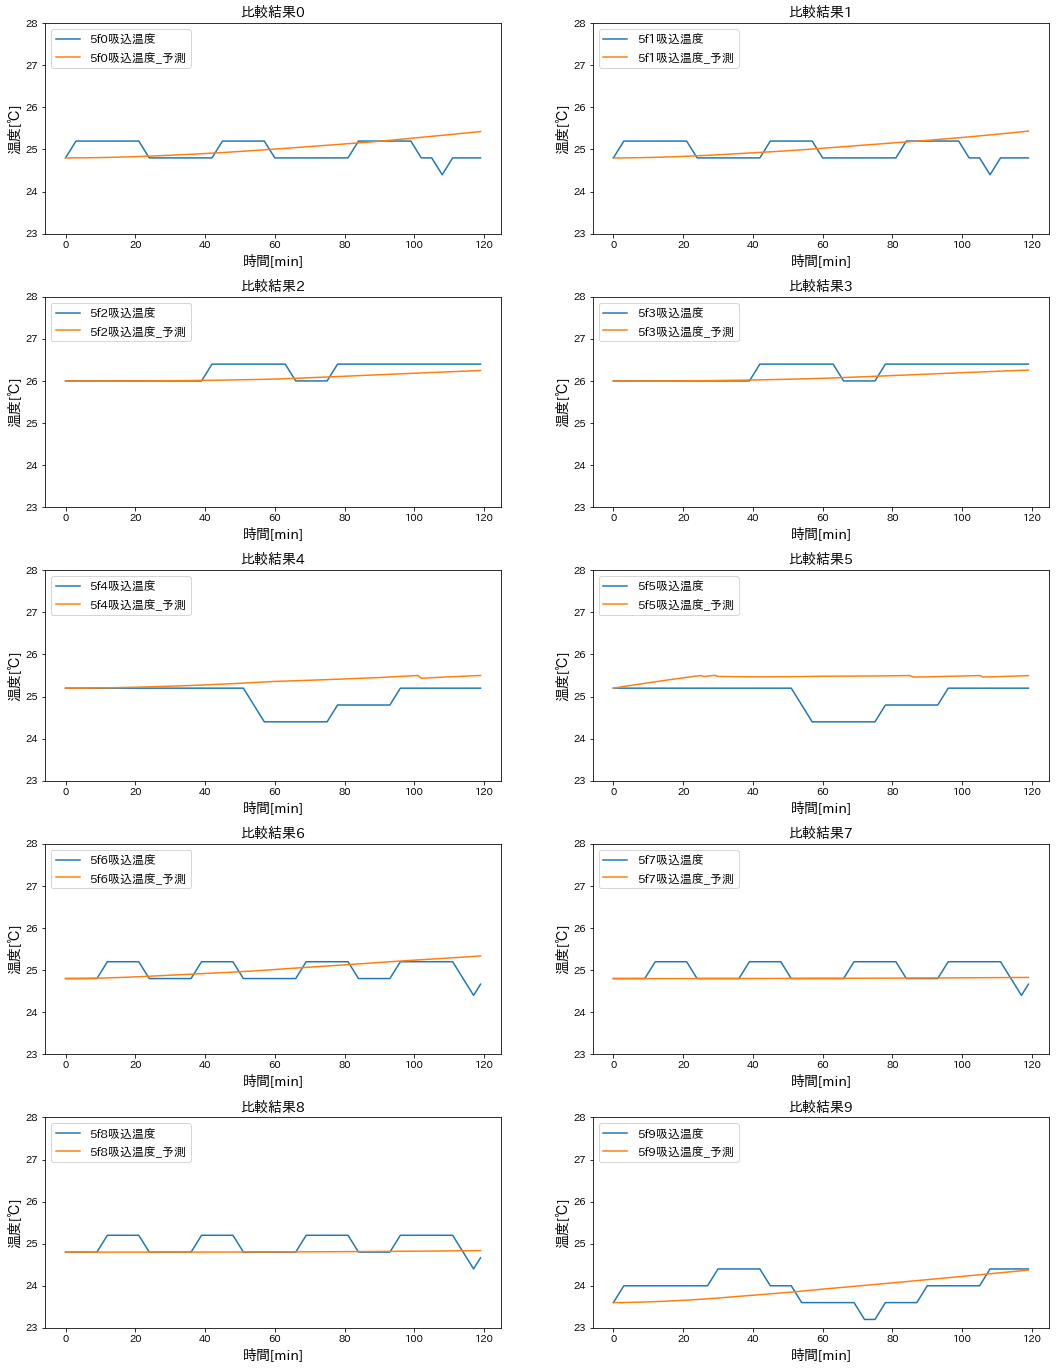

In [133]:
x = [i for i in range(len(df_merge))]

fig = plt.figure(figsize=(18,24))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

ax_set_list = []

for i in range(len(columns)):
    l_1 = columns[i]
    l_2 = columns[i] + "_予測"
    ax_set = fig.add_subplot(len(columns)//2,2 , i+1)
    y1 = df_merge[l_1].values
    y2 = df_merge[l_2].values
    ax_set_list.append([ax_set,(l_1,l_2),(x,y1,y2)])

for c,item in enumerate(ax_set_list):
    item[0].plot(item[2][0],item[2][1],label=item[1][0])
    item[0].plot(item[2][0],item[2][2],label=item[1][1])
    item[0].legend(loc='upper left',fontsize=12)
    
    item[0].set_title("比較結果{}".format(c),fontsize=14)
    item[0].set_xlabel("時間[min]",fontsize=14)
    item[0].set_ylabel("温度[℃]",fontsize=14)
    item[0].set_ylim([23,28])
    
    

# y1 = df_merge[columns[1]]
# y2 = df_merge[columns[1]+"_予測"]
# ax.plot(x,y1)
# ax.plot(x,y2)

In [135]:
a = pd.read_csv("out/result_2021_1_19/cmp/result5.csv")

In [137]:
a.to_csv("out/result_2021_1_19/cmp/result5_test.csv",encoding="shift-jis",index=False)

## シミュレーション結果確認プロトタイプ

In [1]:
import json

In [8]:
json_open = open('out/result_2021_07_2/result5.json', 'r')
json_load = json.load(json_open)

In [10]:
for i in json_load:
    print(i["timestamp"])
    for j in i["agent_list"]:
        if "class" in j.keys():
            if j["class"] == "heat_charge":
                if j["id"] == 3798:
                    print(j)

2021-07-02 00:00:00
2021-07-02 00:01:00
2021-07-02 00:02:00
2021-07-02 00:03:00
2021-07-02 00:04:00
2021-07-02 00:05:00
2021-07-02 00:06:00
2021-07-02 00:07:00
2021-07-02 00:08:00
2021-07-02 00:09:00
2021-07-02 00:10:00
2021-07-02 00:11:00
2021-07-02 00:12:00
2021-07-02 00:13:00
2021-07-02 00:14:00
2021-07-02 00:15:00
2021-07-02 00:16:00
2021-07-02 00:17:00
2021-07-02 00:18:00
2021-07-02 00:19:00
2021-07-02 00:20:00
2021-07-02 00:21:00
2021-07-02 00:22:00
2021-07-02 00:23:00
2021-07-02 00:24:00
2021-07-02 00:25:00
2021-07-02 00:26:00
2021-07-02 00:27:00
2021-07-02 00:28:00
2021-07-02 00:29:00
2021-07-02 00:30:00
2021-07-02 00:31:00
2021-07-02 00:32:00
2021-07-02 00:33:00
2021-07-02 00:34:00
2021-07-02 00:35:00
2021-07-02 00:36:00
2021-07-02 00:37:00
2021-07-02 00:38:00
2021-07-02 00:39:00
2021-07-02 00:40:00
2021-07-02 00:41:00
2021-07-02 00:42:00
2021-07-02 00:43:00
2021-07-02 00:44:00
2021-07-02 00:45:00
2021-07-02 00:46:00
2021-07-02 00:47:00
2021-07-02 00:48:00
2021-07-02 00:49:00


2021-07-02 21:18:00
2021-07-02 21:19:00
2021-07-02 21:20:00
2021-07-02 21:21:00
2021-07-02 21:22:00
2021-07-02 21:23:00
2021-07-02 21:24:00
2021-07-02 21:25:00
2021-07-02 21:26:00
2021-07-02 21:27:00
2021-07-02 21:28:00
2021-07-02 21:29:00
2021-07-02 21:30:00
2021-07-02 21:31:00
2021-07-02 21:32:00
2021-07-02 21:33:00
2021-07-02 21:34:00
2021-07-02 21:35:00
2021-07-02 21:36:00
2021-07-02 21:37:00
2021-07-02 21:38:00
2021-07-02 21:39:00
2021-07-02 21:40:00
2021-07-02 21:41:00
2021-07-02 21:42:00
2021-07-02 21:43:00
2021-07-02 21:44:00
2021-07-02 21:45:00
2021-07-02 21:46:00
2021-07-02 21:47:00
2021-07-02 21:48:00
2021-07-02 21:49:00
2021-07-02 21:50:00
2021-07-02 21:51:00
2021-07-02 21:52:00
2021-07-02 21:53:00
2021-07-02 21:54:00
2021-07-02 21:55:00
2021-07-02 21:56:00
2021-07-02 21:57:00
2021-07-02 21:58:00
2021-07-02 21:59:00
2021-07-02 22:00:00
2021-07-02 22:01:00
2021-07-02 22:02:00
2021-07-02 22:03:00
2021-07-02 22:04:00
2021-07-02 22:05:00
2021-07-02 22:06:00
2021-07-02 22:07:00


## ArtisocとPythonを比較するプログラム

In [93]:
ls data\evaluation\base\2021_7_1

 ドライブ C のボリューム ラベルは Windows です
 ボリューム シリアル番号は 8E7B-B5D5 です

 C:\Users\k31m0\Kushiro_lab\thermal agent simulation\data\evaluation\base\2021_7_1 のディレクトリ

2021/10/21  16:45    <DIR>          .
2021/10/21  16:45    <DIR>          ..
2021/10/24  03:38           209,874 all_bems_data5.csv
               1 個のファイル             209,874 バイト
               2 個のディレクトリ  188,112,887,808 バイトの空き領域


In [126]:
#!python3.5
# Artisoc, Python, BEMSの3種類の吸い込み温度を比較するプログラム

# ライブラリ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

# Pythonファイルパス
pypath = 'out/result_2021_07_2_fix/cmp/result5.csv'
# Artisocファイルパス
artpath = 'artisoc/07-02/result.xlsx'
# BEMSデータファイルパス

sourcepath = 'data/evaluation/base/2021_7_2/all_bems_data5.csv'

# 各ファイルをインポート
# pydf = pd.read_csv(pypath,engine='python',header=None,usecols=[1,2,3,4,5,6,7,8,9,10])
# time = pd.read_csv(pypath,engine='python',header=None,usecols=[1])

# Pythonファイルをインポート
pydf = pd.read_csv(pypath,encoding="shift-jis")
# Artisocファイルをインポート
# artdf = pd.read_excel(artpath,header=None,usecols=[4,5,6,7,8,9,10,11,12,13])
artdf = pd.read_excel(artpath,encoding="shift-jis",usecols=[0,4,5,6,7,8,9,10,11,12,13])
# BEMSファイルをインポート
# sourcedf = pd.read_excel(sourcepath,header=None,usecols=[83,84,85,86,87])
sourcedf = pd.read_csv(sourcepath,encoding="shift-jis")

In [146]:
if len(artdf) == len(pydf) == len(sourcedf):
    pass
else:
    print('データ数が不足しています。存在するデータ数の中で最小の物に合わせて出力します。')

データ数が不足しています。存在するデータ数の中で最小の物に合わせて出力します。


In [150]:
def adjast_bems_columns(df):
    
    new_columns = []
    for column in df.columns:
        if "吸込温度" in column or "時間" in column:
            new_columns.append(column)
            
    df_source_new_columns = df[new_columns]
    
    for column in df_source_new_columns:
        if not column == "時間":
            df_source_new_columns = df_source_new_columns.rename(columns={column:column+"_bems"})
        
    return df_source_new_columns

In [151]:
def uniform_time(df_py, df_art, df_bems):
    """ 各データの時間をpythonデータに合わせる関数

    Args:
        df_py ([DataFrame]): pythonの結果データを読み込んだDataFrame
        df_art ([DataFrame]): Artisocの結果データを読み込んだDataFrame
        df_bems ([DataFrame]): BEMSのデータを読み込んだDataFrame

    Returns:
        [DataFrame]: 全てのデータを統合して時間を統一したプログラム        
    """    
    
    # python,bemsの時間をDate型へ変換（文字列によるバグを検出するため）
    df_py["時間"] = pd.to_datetime(df_py['時間'], format='%Y-%m-%d %H:%M:')
    df_bems["時間"] = pd.to_datetime(df_bems['時間'], format='%Y-%m-%d %H:%M:')
    # pythonの基準日時を取得
    base_time = df_py.iloc[0]["時間"]
    base_date = "{0}-{1}-{2} ".format(base_time.year,base_time.month,base_time.day)
    # artisocの時間をdatetime型に変換するために文字列で標準形に変換
    df_art["時間"] =  [base_date]*len(df_art) + df_art["時間"]
    df_art["時間"] = pd.to_datetime(df_art["時間"],format='%Y-%m-%d %H:%M:')
    
    df_py = pd.merge(df_py,df_art, how="inner", on="時間")
    df_py = pd.merge(df_py,df_bems,how="inner", on="時間")
    
    return df_py

In [132]:
df_new_source = adjast_bems_columns(sourcedf)

In [133]:
df_integrate = uniform_time(pydf,artdf,df_new_source)

In [143]:
for column in df_integrate.columns:
    if column != "時間":
        df_integrate[column] = df_integrate[column].astype("float")

In [166]:
def create_graph_data(df):
    _id = [i for i in range(10)]
    simple_data = {}
    gap_data = {}
    for n in _id:
        simple_data[n] = {
            "timestamp" : df["時間"].values,
            "artisoc"   : df["観測温度{}".format(n+1)].values,
            "python"    : df["5f{}吸込温度".format(n)].values,
            "bems"      : df["5f{}吸込温度_bems".format(n)].values,
        }
        gap_data[n]    = {
            "timestamp": df["時間"].values,
            "artisoc"  : (df["5f{}吸込温度_bems".format(n)] - df["観測温度{}".format(n+1)]).values,
            "python"   : (df["5f{}吸込温度_bems".format(n)] - df["5f{}吸込温度".format(n)]).values
        }
    
    return simple_data, gap_data

In [168]:
simple_data,gap_data = create_graph_data(df_integrate)

## 温度取りデータ整形プログラム

In [79]:
import pandas as pd
import glob
from datetime import datetime as dt
import datetime
import os

In [10]:
ls data\src\温度取り\温度とり2021年9月\温度とり2021年9月

 ドライブ C のボリューム ラベルは Windows です
 ボリューム シリアル番号は 8E7B-B5D5 です

 C:\Users\k31m0\Kushiro_lab\thermal agent simulation\data\src\温度取り\温度とり2021年9月\温度とり2021年9月 のディレクトリ

2021/10/20  20:11    <DIR>          .
2021/10/20  20:11    <DIR>          ..
2021/09/27  23:34           873,474 20210827_595-611.csv
2021/09/27  23:34           874,406 20210827_616-623.csv
2021/09/27  23:34           875,304 20210827_624-632.csv
2021/09/27  23:34           873,702 20210827_633-659.csv
2021/09/27  23:34           871,696 20210903_595-611.csv
2021/09/27  23:34           873,104 20210903_616-623.csv
2021/09/27  23:34           870,932 20210903_624-632.csv
2021/09/27  23:34           874,652 20210903_633-659.csv
2021/09/27  23:34           875,134 20210910_595-611.csv
2021/09/27  23:34           873,054 20210910_616-623.csv
2021/09/27  23:34           874,416 20210910_624-632.csv
2021/09/27  23:34           873,190 20210910_633-659.csv
              12 個のファイル          10,483,064 バイト
               2 個のディレクトリ  185,

In [82]:
ls data\evaluation

 ドライブ C のボリューム ラベルは Windows です
 ボリューム シリアル番号は 8E7B-B5D5 です

 C:\Users\k31m0\Kushiro_lab\thermal agent simulation\data\evaluation のディレクトリ

2021/10/20  21:00    <DIR>          .
2021/10/20  21:00    <DIR>          ..
2021/10/21  16:56    <DIR>          base
2021/10/24  04:53    <DIR>          control
2021/10/21  16:56    <DIR>          init_bems
2021/10/20  20:10    <DIR>          observe
               0 個のファイル                   0 バイト
               6 個のディレクトリ  185,185,394,688 バイトの空き領域


In [24]:
file_path = "data/src/温度取り/温度とり2021年9月/温度とり2021年9月/20210827_595-611.csv"

In [25]:
dir_path = "data/src/温度取り/温度とり2021年9月/温度とり2021年9月/"

In [26]:
df_arr = []
files = glob.glob("{}*.csv".format(dir_path))
for i in files:
    df_arr.append(pd.read_csv(i,encoding="shift-jis"))

In [27]:
def adjust_time(df):
    time_arr = []
    for i in range(len(df)):
#         print(df.iloc[i]["date"].replace("/","-").replace("'",":")[:-3])
        time_arr.append(dt.strptime(df.iloc[i]["date"].replace("/","-").replace("'",":")[:-3], '%Y-%m-%d %H:%M'))
    df["date"] = time_arr

In [28]:
for i in range(len(df_arr)):
    adjust_time(df_arr[i])

In [22]:
df_arr[0]

,date,595,596,597,608,609,610,611
0,2021-08-16 15:03:00,26.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-08-16 15:04:00,26.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-08-16 15:05:00,26.0,26.0,NaN,NaN,NaN,NaN,NaN
3,2021-08-16 15:06:00,26.0,26.0,NaN,NaN,NaN,NaN,NaN
4,2021-08-16 15:07:00,26.0,26.0,26.4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
16010,2021-08-27 17:53:00,NaN,NaN,NaN,NaN,NaN,25.1,26.0
16011,2021-08-27 17:54:00,NaN,NaN,NaN,NaN,NaN,25.1,26.0
16012,2021-08-27 17:55:00,NaN,NaN,NaN,NaN,NaN,NaN,26.1
16013,2021-08-27 17:56:00,NaN,NaN,NaN,NaN,NaN,NaN,26.1


In [29]:
def merge_rows(df,start,end):
    result_df = pd.merge(df[start],df[start+1],on="date")
    for i in range(start+2,end):
        result_df = pd.merge(result_df,df[i],on="date")
    return result_df

In [33]:
edit_df_arr = []
for i in range(3):
    edit_df_arr.append(merge_rows(df_arr,4*i,4*(i+1)))

In [60]:
edit_df_arr[0]

,date,595,596,597,608,609,610,611,616,618,...,628,631,632,633,634,636,637,638,652,659
0,2021-08-16 15:53:00,26.0,26.1,26.5,25.4,24.5,24.0,23.3,26.0,26.1,...,25.1,24.6,23.8,26.4,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-08-16 15:54:00,26.0,26.1,26.5,25.4,24.5,24.0,23.4,26.0,26.1,...,25.1,24.7,23.8,26.4,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-08-16 15:55:00,26.0,26.1,26.5,25.4,24.5,24.0,23.4,26.0,26.1,...,25.1,24.7,23.8,26.3,26.2,NaN,NaN,NaN,NaN,NaN
3,2021-08-16 15:56:00,26.0,26.1,26.5,25.4,24.5,24.0,23.4,25.9,26.1,...,25.1,24.7,23.9,26.3,26.2,NaN,NaN,NaN,NaN,NaN
4,2021-08-16 15:57:00,26.0,26.1,26.5,25.4,24.6,24.0,23.4,25.9,26.1,...,25.1,24.7,23.9,26.3,26.2,26.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15960,2021-08-27 17:53:00,NaN,NaN,NaN,NaN,NaN,25.1,26.0,25.4,26.7,...,24.9,25.1,24.5,24.7,24.9,25.1,24.3,24.5,24.7,24.0
15961,2021-08-27 17:54:00,NaN,NaN,NaN,NaN,NaN,25.1,26.0,25.4,26.7,...,24.9,25.1,24.5,24.7,24.8,25.1,24.3,24.5,24.7,24.0
15962,2021-08-27 17:55:00,NaN,NaN,NaN,NaN,NaN,NaN,26.1,25.4,26.7,...,24.9,25.1,24.5,24.6,24.8,25.1,24.3,24.5,24.7,24.0
15963,2021-08-27 17:56:00,NaN,NaN,NaN,NaN,NaN,NaN,26.1,25.4,26.6,...,24.9,25.1,24.5,24.6,24.8,25.0,24.2,24.5,24.6,24.0


In [61]:
edit_df_arr[1]

,date,595,596,597,608,609,610,611,616,618,...,628,631,632,633,634,636,637,638,652,659
0,2021-08-23 15:54:00,26.3,26.8,27.4,26.4,25.8,25.0,25.4,25.6,27.2,...,25.3,24.5,23.7,25.8,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-08-23 15:55:00,26.3,26.8,27.4,26.4,25.8,25.0,25.3,25.6,27.2,...,25.4,24.5,23.7,25.8,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-08-23 15:56:00,26.3,26.8,27.4,26.4,25.8,25.0,25.3,25.6,27.2,...,25.4,24.5,23.8,25.8,26.0,NaN,NaN,NaN,NaN,NaN
3,2021-08-23 15:57:00,26.3,26.8,27.3,26.4,25.8,25.0,25.3,25.6,27.2,...,25.4,24.5,23.8,25.8,26.0,NaN,NaN,NaN,NaN,NaN
4,2021-08-23 15:58:00,26.3,26.8,27.3,26.4,25.8,25.0,25.2,25.7,27.2,...,25.4,24.5,23.8,25.8,26.0,25.8,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15960,2021-09-03 17:54:00,NaN,NaN,NaN,NaN,NaN,25.3,25.4,25.0,26.2,...,25.9,26.1,25.7,24.4,24.7,25.2,25.8,25.7,25.9,25.6
15961,2021-09-03 17:55:00,NaN,NaN,NaN,NaN,NaN,NaN,25.4,25.0,26.2,...,25.9,26.1,25.7,24.4,24.7,25.2,25.8,25.8,25.9,25.6
15962,2021-09-03 17:56:00,NaN,NaN,NaN,NaN,NaN,NaN,25.4,25.0,26.1,...,25.9,26.1,25.7,24.4,24.7,25.2,25.8,25.8,25.9,25.6
15963,2021-09-03 17:57:00,NaN,NaN,NaN,NaN,NaN,NaN,25.4,25.0,26.1,...,25.9,26.1,25.8,24.4,24.7,25.2,25.8,25.8,26.0,25.6


In [75]:
def add_rows_data(df,df1):
    for i in range(len(df)):
        if df1.iloc[0]["date"] == df.iloc[i]["date"]:
            return pd.concat([df.iloc[:i],df1])

In [76]:
for i in range(len(edit_df_arr)):
    if i == 0:
        result_df = add_rows_data(edit_df_arr[0],edit_df_arr[1])
        i += 1
    else:
        result_df = add_rows_data(result_df,edit_df_arr[i])

In [193]:
new_columns = ["時間"]
for i in result_df.columns:
    if i != "date":
        new_columns.append(i+"_実測値")
result_df.columns = new_columns

In [198]:
def create_one_day_data(df):
    start_date = dt(df.iloc[0]["時間"].year,df.iloc[0]["時間"].month,df.iloc[0]["時間"].day)
    end_date = start_date + datetime.timedelta(days=1)
    final_date = dt(df.iloc[-1]["時間"].year,df.iloc[-1]["時間"].month,df.iloc[-1]["時間"].day)
    
    while start_date <= final_date:
        one_df = df[(df["時間"] >= start_date)&(df["時間"] < end_date)]
        dir_path_str = "data/evaluation/observe/{0}_{1}_{2}/".format(start_date.year,start_date.month,start_date.day)
        start_date += datetime.timedelta(days=1)
        end_date = start_date + datetime.timedelta(days=1)
    
        os.makedirs(dir_path_str,exist_ok=True)
        result_file_path = dir_path_str + "observe.csv"
        print(result_file_path)
        one_df.to_csv(result_file_path,encoding="shift_jis",index=None)

In [199]:
create_one_day_data(result_df)

data/evaluation/observe/2021_8_16/observe.csv
data/evaluation/observe/2021_8_17/observe.csv
data/evaluation/observe/2021_8_18/observe.csv
data/evaluation/observe/2021_8_19/observe.csv
data/evaluation/observe/2021_8_20/observe.csv
data/evaluation/observe/2021_8_21/observe.csv
data/evaluation/observe/2021_8_22/observe.csv
data/evaluation/observe/2021_8_23/observe.csv
data/evaluation/observe/2021_8_24/observe.csv
data/evaluation/observe/2021_8_25/observe.csv
data/evaluation/observe/2021_8_26/observe.csv
data/evaluation/observe/2021_8_27/observe.csv
data/evaluation/observe/2021_8_28/observe.csv
data/evaluation/observe/2021_8_29/observe.csv
data/evaluation/observe/2021_8_30/observe.csv
data/evaluation/observe/2021_8_31/observe.csv
data/evaluation/observe/2021_9_1/observe.csv
data/evaluation/observe/2021_9_2/observe.csv
data/evaluation/observe/2021_9_3/observe.csv
data/evaluation/observe/2021_9_4/observe.csv
data/evaluation/observe/2021_9_5/observe.csv
data/evaluation/observe/2021_9_6/observ

## 8/24の温度取りデータの比較

In [200]:
df_observe = pd.read_csv("data/evaluation/observe/2021_8_24/observe.csv",encoding="shift-jis")

In [201]:
df_artisoc = pd.read_csv("artisoc/08-24/result.csv",encoding="shift-jis")

In [202]:
df_observe.head()

,時間,595_温度取り_実測値_実測値,596_温度取り_実測値_実測値,597_温度取り_実測値_実測値,608_温度取り_実測値_実測値,609_温度取り_実測値_実測値,610_温度取り_実測値_実測値,611_温度取り_実測値_実測値,616_温度取り_実測値_実測値,618_温度取り_実測値_実測値,...,631_温度取り_実測値_実測値,632_温度取り_実測値_実測値,633_温度取り_実測値_実測値,634_温度取り_実測値_実測値,636_温度取り_実測値_実測値,637_温度取り_実測値_実測値,638_温度取り_実測値_実測値,652_温度取り_実測値_実測値,659_温度取り_実測値_実測値,"625""_温度取り_実測値_実測値"
0,2021-08-24 00:00:00,26.0,26.1,26.1,25.9,25.9,25.8,25.9,25.6,26.0,...,25.8,25.8,25.4,25.7,25.6,25.7,25.9,25.9,25.6,25.9
1,2021-08-24 00:01:00,26.0,26.1,26.1,25.9,25.9,25.8,25.9,25.6,26.0,...,25.8,25.8,25.4,25.7,25.6,25.7,25.9,25.9,25.6,25.9
2,2021-08-24 00:02:00,26.0,26.1,26.1,25.9,25.9,25.8,25.9,25.6,26.0,...,25.8,25.8,25.4,25.7,25.6,25.7,25.9,25.9,25.6,25.9
3,2021-08-24 00:03:00,26.0,26.1,26.1,25.9,25.9,25.8,25.9,25.6,26.0,...,25.8,25.8,25.4,25.7,25.6,25.7,25.9,25.9,25.6,25.9
4,2021-08-24 00:04:00,26.0,26.1,26.1,25.9,25.9,25.7,25.9,25.6,26.0,...,25.8,25.8,25.4,25.7,25.6,25.7,25.9,25.9,25.6,25.9


In [203]:
df_artisoc.head()

,時間,消費電力,室内温度,観測温度0,観測温度1,観測温度2,観測温度3,観測温度4,観測温度5,観測温度6,...,温度取りポイント617,温度取りポイント629,温度取りポイント635,空間の温度1,空間の温度2,空間の温度3,空間の温度4,空間の温度5,窓空きの温度,Unnamed: 86
0,00:00,0.0,26.48,25.6,25.6,27.200000,27.200000,25.6,25.6,27.600000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN
1,00:01,0.0,26.48,25.6,25.6,27.200000,27.200000,25.6,25.6,27.600000,...,25.600006,27.2,27.599267,25.649390,25.600000,27.599854,27.599269,25.6,26.7,NaN
2,00:02,0.0,26.48,25.6,25.6,27.200000,27.200000,25.6,25.6,27.599999,...,25.600045,27.2,27.597226,25.693895,25.600000,27.599445,27.597225,25.6,26.7,NaN
3,00:03,0.0,26.48,25.6,25.6,27.199998,27.199998,25.6,25.6,27.599997,...,25.600144,27.2,27.594080,25.735019,25.600001,27.598816,27.594080,25.6,26.7,NaN
4,00:04,0.0,26.48,25.6,25.6,27.199994,27.199995,25.6,25.6,27.599991,...,25.600324,27.2,27.590008,25.771963,25.600002,27.598002,27.590008,25.6,26.7,NaN


In [204]:
columns = ["時間","温度取りポイント598","温度取りポイント612","温度取りポイント613","温度取りポイント617","温度取りポイント629","温度取りポイント635"]

In [205]:
df_artisoc_observe = df_artisoc[columns]

In [206]:
df_artisoc_observe

,時間,温度取りポイント598,温度取りポイント612,温度取りポイント613,温度取りポイント617,温度取りポイント629,温度取りポイント635
0,00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,00:01,25.600000,25.600585,27.600000,25.600006,27.200000,27.599267
2,00:02,25.600000,25.602217,27.600000,25.600045,27.200000,27.597226
3,00:03,25.600000,25.604734,27.600000,25.600144,27.200000,27.594080
4,00:04,25.600000,25.607991,27.600000,25.600324,27.200000,27.590008
...,...,...,...,...,...,...,...
1434,23:54,25.484690,25.664317,27.484495,25.232543,26.914025,27.200080
1435,23:55,25.486921,25.668344,27.494230,25.235402,26.918529,27.206172
1436,23:56,25.489053,25.672292,27.503442,25.238254,26.922790,27.211713
1437,23:57,25.491090,25.676164,27.512159,25.241098,26.926822,27.216738


In [207]:
def format_time(df,time):
    time_arr = []
    for i in range(len(df)):
        a = datetime.datetime(time.year,time.month,time.day,time.hour,time.minute,0)
        b = a.strftime('%Y-%m-%d') + " "
        time_arr.append(b + df.iloc[i]["時間"] + ":00")
#         time_arr.append(dt.strptime(df.iloc[i]["date"].replace("/","-").replace("'",":")[:-3], '%Y-%m-%d %H:%M'))
    df["時間"] = time_arr

In [209]:
format_time(df_artisoc_observe,dt.strptime(df_observe.iloc[0]["時間"][:-3],"%Y-%m-%d %H:%M"))

C:\Users\k31m0\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [210]:
df_artisoc_observe

,時間,温度取りポイント598,温度取りポイント612,温度取りポイント613,温度取りポイント617,温度取りポイント629,温度取りポイント635
0,2021-08-24 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2021-08-24 00:01:00,25.600000,25.600585,27.600000,25.600006,27.200000,27.599267
2,2021-08-24 00:02:00,25.600000,25.602217,27.600000,25.600045,27.200000,27.597226
3,2021-08-24 00:03:00,25.600000,25.604734,27.600000,25.600144,27.200000,27.594080
4,2021-08-24 00:04:00,25.600000,25.607991,27.600000,25.600324,27.200000,27.590008
...,...,...,...,...,...,...,...
1434,2021-08-24 23:54:00,25.484690,25.664317,27.484495,25.232543,26.914025,27.200080
1435,2021-08-24 23:55:00,25.486921,25.668344,27.494230,25.235402,26.918529,27.206172
1436,2021-08-24 23:56:00,25.489053,25.672292,27.503442,25.238254,26.922790,27.211713
1437,2021-08-24 23:57:00,25.491090,25.676164,27.512159,25.241098,26.926822,27.216738


In [212]:
merge_result = pd.merge(df_artisoc_observe,df_observe,on="時間")

In [214]:
merge_result.head()

,時間,温度取りポイント598,温度取りポイント612,温度取りポイント613,温度取りポイント617,温度取りポイント629,温度取りポイント635,595_温度取り_実測値_実測値,596_温度取り_実測値_実測値,597_温度取り_実測値_実測値,...,631_温度取り_実測値_実測値,632_温度取り_実測値_実測値,633_温度取り_実測値_実測値,634_温度取り_実測値_実測値,636_温度取り_実測値_実測値,637_温度取り_実測値_実測値,638_温度取り_実測値_実測値,652_温度取り_実測値_実測値,659_温度取り_実測値_実測値,"625""_温度取り_実測値_実測値"
0,2021-08-24 00:00:00,0.0,0.000000,0.0,0.000000,0.0,0.000000,26.0,26.1,26.1,...,25.8,25.8,25.4,25.7,25.6,25.7,25.9,25.9,25.6,25.9
1,2021-08-24 00:01:00,25.6,25.600585,27.6,25.600006,27.2,27.599267,26.0,26.1,26.1,...,25.8,25.8,25.4,25.7,25.6,25.7,25.9,25.9,25.6,25.9
2,2021-08-24 00:02:00,25.6,25.602217,27.6,25.600045,27.2,27.597226,26.0,26.1,26.1,...,25.8,25.8,25.4,25.7,25.6,25.7,25.9,25.9,25.6,25.9
3,2021-08-24 00:03:00,25.6,25.604734,27.6,25.600144,27.2,27.594080,26.0,26.1,26.1,...,25.8,25.8,25.4,25.7,25.6,25.7,25.9,25.9,25.6,25.9
4,2021-08-24 00:04:00,25.6,25.607991,27.6,25.600324,27.2,27.590008,26.0,26.1,26.1,...,25.8,25.8,25.4,25.7,25.6,25.7,25.9,25.9,25.6,25.9


In [215]:
result_columns = ["598","612","613","617","629","635"]

In [216]:
ls eval

 ドライブ C のボリューム ラベルは Windows です
 ボリューム シリアル番号は 8E7B-B5D5 です

 C:\Users\k31m0\Kushiro_lab\thermal agent simulation\eval のディレクトリ

2021/10/23  14:08    <DIR>          .
2021/10/23  14:08    <DIR>          ..
2021/10/23  14:08    <DIR>          2021-07-1
2021/10/24  15:46    <DIR>          2021-07-2
2021/10/23  14:07    <DIR>          2021-1-18
2021/10/23  04:26    <DIR>          2021-1-19
2021/10/23  14:07    <DIR>          2021-1-20
               0 個のファイル                   0 バイト
               7 個のディレクトリ  184,841,990,144 バイトの空き領域


In [217]:
merge_result.to_csv("eval/result.csv",encoding="shift-jis")